## Lista 6
### Magdalena Ryś 276004

In [2]:
import numpy as np
from scipy.integrate import simpson
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def my_simpson(y, dx):
    '''
    Function:
        Funkcja obliczająca całkę metodą simpsona
    Input:
        y (float) - wartość całkowana
        dx (float) - jednostka całkowania
    Output:
        result (float) - rozwiązanie
    ''' 
 
    result = y[0] + y[-1]  
    result += 4 * np.sum(y[1:-1:2])  
    result += 2 * np.sum(y[2:-2:2])  
    result *= dx / 3
    
    return result

In [4]:
def trapez(f, a, b, n):
    '''
    Function:
        Funkcja obliczająca całkę metodą trapezów
    Input:
        f (funct) - funkcja
        a (float) - początek przedziału
        b (float) - koniec przedziału
        n (int) - ilość węzłów
    Output:
        (float) - rozwiązanie
    ''' 
    h = (b - a) / n  
    t_values = np.linspace(a, b, n + 1) 
    f_values = f(t_values)  

    return (h / 2) * (f_values[0] + 2 * np.sum(f_values[1:-1]) + f_values[-1])

### Zadanie 1
W tabeli 1 przedstawiona jest moc $P$ przyłożona do kół samochodu jako funkcja prędkości $v$. Zakładając, że masa samochodu $m$ wynosi 2000 kg, wyznacz czas potrzebny do rozpędzenia samochodu od prędkości 1 m/s do 6 m/s. 

Wskazówka:  
$$
\Delta t = m \int_{v_1}^{v_2} \frac{v}{P} \, dv
$$

| $v$ (m/s) |  1,0 | 1,8 | 2,4 | 3,5 | 4,4 | 5,1 | 6,0 |
|-----------|-----|-----|-----|-----|-----|-----|-----|
| $P$ (kW)  | 4,7 | 12,2| 19,0| 31,8| 40,1| 43,8| 43,2 |


In [5]:
v = np.array([1.0, 1.8, 2.4, 3.5, 4.4, 5.1, 6.0])
P = np.array([4.7, 12.2, 19.0, 31.8, 40.1, 43.8, 43.2]) * 1000 
m = 2000  

divide = v / P
n = 3
dx = v[1] - v[0]  

integral = my_simpson(divide, dx)
integral_test = simpson(divide, dx=dx)
delta_t = m * integral
delta_t_test = m * integral_test

print(f"Wyznaczony czas  : {delta_t} sekund.")
print(f"Sprawdzenie scipy: {delta_t_test} sekund.")

Wyznaczony czas  : 1.2372835884079711 sekund.
Sprawdzenie scipy: 1.2372835884079711 sekund.


### Zadanie 2
Oblicz całkę
$$
 \int_{-1}^{1} \cos{(2\cos{^{-1}x})} dx
$$
korzystając ze wzoru Simpsona dla 3, 5 i 7 węzłów. Wyjaśnij wyniki

In [6]:
def f(x):
    return np.cos(2 * np.arccos(x))

a, b = -1, 1
nodes = [3, 5, 7]

results = {}

for n in nodes:
    x = np.linspace(a, b, n)  
    y = f(x)  
    dx = (b - a) / (n-1)  
    result = my_simpson(y, dx)  
    results[n] = result

for n, res in results.items():
    print(f"wynik dla {n} węzłów: ", res)

wynik dla 3 węzłów:  -0.6666666666666666
wynik dla 5 węzłów:  -0.6666666666666665
wynik dla 7 węzłów:  -0.6666666666666666


### Zadanie 3
Oblicz całkę
$$
 \int_{-1}^{\infty} (1+x^4)^{-1} dx
$$
korzystając ze wzoru trapezów dla 6 węzłów. Wskazówka: skorzystaj z
podstawienia $x^3 = 1/t$


Stosujemy podstawienie $x^3 = 1/t$. Wtedy $t = 1/x^{3}$ oraz $dx = -\frac{1}{3} t^{-4/3}dt$. W granicach dla $x=-1$, $t=\frac{1}{-1^{3}}=-1$ natomiast $x \to \infty$, $t \to 0$.  Podstawiamy do całki:

$$
\int_{-1}^\infty \frac{1}{1 + x^4} \, dx 
= \int_{-1}^0 \frac{1}{1 + \left(t^{-1/3}\right)^4} \cdot \left(-\frac{1}{3} t^{-4/3}\right) \, dt = \frac{1}{3} \int_{-1}^0 \frac{t^{-4/3}}{1 + t^{-4/3}} \, dt
$$

Wyrażenie podcałkowe upraszczamy:
$$
\frac{t^{-4/3}}{1 + t^{-4/3}} = \frac{1}{t^{4/3} + 1}
$$

Ostatecznie:
$$
\int_{-1}^\infty \frac{1}{1 + x^4} \, dx 
= \frac{1}{3} \int_{-1}^0 \frac{1}{t^{4/3} + 1} \, dt
$$

In [7]:
def transformed_function(t):
    return 1 / ((np.abs(t) ** (4/3)) + 1)

a = -1  
b = 0   
n = 6 

integral = (1/3) * trapez(transformed_function, a, b, n)
print("Przybliżona wartość całki:", integral)


Przybliżona wartość całki: 0.24369906525637575


### Zadanie 4
Okres $T$ wahadła matematycznego o długości $L$ zadany jest wzorem:  
$$
T = 4 \sqrt{\frac{L}{g}} h(\theta_0),
$$
gdzie $g$ to przyspieszenie ziemskie, $\theta_0$ to amplituda, oraz  
$$
h(\theta_0) = \int_{0}^{\pi/2} \frac{d\theta}{\sqrt{1 - \sin^2\left(\frac{\theta_0}{2}\right) \sin^2\theta}}.
$$

Oblicz $h(15^\circ)$, $h(30^\circ)$ i $h(45^\circ)$. Porównaj te wartości z $h(0) = \pi/2$, stosowanym w przybliżeniu harmonicznym.

In [8]:
def zad4(theta, theta0):
    return 1 / np.sqrt(1 - (np.sin(theta0 / 2) ** 2) * (np.sin(theta) ** 2))

theta0 = [15, 30, 45] 
theta0_rad = [np.radians(theta) for theta in theta0]  
a, b = 0, np.pi / 2 
n = 1000

result = []
for th in theta0_rad:
    t_values = np.linspace(a, b, n + 1)
    f_values = zad4(t_values, th)
    
    h_simpson = my_simpson(f_values, (b - a) / n)
    result.append(h_simpson)

h0 = np.pi / 2

for i, theta0 in enumerate(theta0):
    print(f"h({theta0}°) = {result[i]}")
print(f"przybliżenie harmoniczne h(0) = {h0}")


h(15°) = 1.5775516607636666
h(30°) = 1.5981420021125403
h(45°) = 1.633586307458148
przybliżenie harmoniczne h(0) = 1.5707963267948966


### Zadanie 5
Oblicz całkę
$$
 \int_{-1}^{\pi} \frac{\ln{x}}{x^2-2x+2} dx
$$
metodą Gaussa-Legendre’a dla 2 i 4 węzłów

In [9]:
def zad5(x):
    return np.log(x) / (x**2 - 2*x + 2)

def gauss_legendre(func, a, b, n):
    '''
    Function:
        Funkcja obliczająca całkę metodą Gaussa-Legendre'a
    Input:
        f (funct) - funkcja
        a (float) - początek przedziału
        b (float) - koniec przedziału
        n (int) - ilość węzłów
    Output:
        (float) - rozwiązanie
    ''' 
    nodes, weights = np.polynomial.legendre.leggauss(n)
    x = 0.5 * (b - a) * nodes + 0.5 * (a + b)
    w = 0.5 * (b - a) * weights
    return np.sum(w * func(x))

a, b = 0, np.pi
nodes = [2, 4]
result = np.zeros(nodes)

for i, node in enumerate(nodes):
    print(f"wynik dla {node} węzłów: ", gauss_legendre(zad5, a, b, node))

wynik dla 2 węzłów:  -0.13045368763793114
wynik dla 4 węzłów:  -0.011382507402479841


### Zadanie 6
Dane są funkcje:
$f_1(x) = x^3 - 2x$, $f_2(x) = \sin x$, $f_3(x) = e^x$. 
Uzupełnij tabelę.
Pochodne | $h$      | $f'_1(x) - D_{f_1}$ | $f'_2(x) - D_{c_2}$ | $f'_3(x) - D_{c_4}$ |
|----|----------|----------------------|---------------------|---------------------|
$f'_1(1) = 1$ | $0.1$    |  |  |   |
| | $0.01$   |   | |  |
| | $0.001$  |     |     |   |
| $f'_2(\pi/3) = 1/2$ | $0.1$    |   |    |   |
| | $0.01$   | |  | |
| | $0.001$  |  |   |    |
|$f'_3(0) = 1$ | $0.1$    |    |  | |
| | $0.01$   | | |  |
| | $0.001$  | |  |  |

Korzystamy ze wzorów:

- $D_{f_1}$: $D_{f_1} = \dfrac{f(x+h)-f(x)}{h}$
- $D_{c_2}$: $D_{c_2} = \dfrac{f(x+h)-f(x-h)}{2h}$
- $D_{c_4}$: $D_{c_4} = \dfrac{8f(x+h)-8f(x-h)-f(x+2h)+f(x-2h)}{12h}$

In [10]:
def Dc1(f, x, h):
    return (f(x + h) - f(x)) / h

def Dc2(f, x, h):
    return (f(x + h) - f(x-h)) / (2*h)

def Dc4(f, x, h):
    return (8*f(x + h) - 8*f(x-h) - f(x+2*h) + f(x - 2*h)) / (12*h)

In [11]:
def f1(x):
    return x**3 - 2*x

def f2(x):
    return np.sin(x)

def f3(x):
    return np.exp(x)

x1 = 1
x2 = np.pi / 3
x3 = 0

h_values = [0.1, 0.01, 0.001]

results = []

for h in h_values:
    results.append(["f1", h, 1 - Dc1(f1, x1, h), 1 - Dc2(f1, x1, h), 1 - Dc4(f1, x1, h)])

for h in h_values:
    results.append(["f2", h,  1/2 - Dc1(f2, x2, h),  1/2 - Dc2(f2, x2, h),  1/2 - Dc4(f2, x2, h)])

for h in h_values:
    results.append(["f3", h,  1 - Dc1(f3, x3, h),  1 - Dc2(f3, x3, h),  1 - Dc4(f3, x3, h)])

columns = ["Function", "h", "f'(x) - Dc1", "f'(x) - Dc2", "f'(x) - Dc4"]
df = pd.DataFrame(results, columns=columns)
print(df)

  Function      h  f'(x) - Dc1   f'(x) - Dc2   f'(x) - Dc4
0       f1  0.100    -0.310000 -1.000000e-02 -1.110223e-15
1       f1  0.010    -0.030100 -1.000000e-04 -4.662937e-15
2       f1  0.001    -0.003001 -1.000000e-06  3.619327e-14
3       f2  0.100     0.044098  8.329168e-04  1.664684e-06
4       f2  0.010     0.004338  8.333292e-06  1.666588e-10
5       f2  0.001     0.000433  8.333340e-08  1.105782e-13
6       f3  0.100    -0.051709 -1.667500e-03  3.337304e-06
7       f3  0.010    -0.005017 -1.666675e-05  3.333481e-10
8       f3  0.001    -0.000500 -1.666667e-07  2.686740e-14


### Zadanie 7
Na podstawie danych z tabeli oblicz $f'(0.2)$ najdokładniej, jak to tylko możliwe:  

| $x$      | 0.0     | 0.1     | 0.2     | 0.3     | 0.4     |
|----------|---------|---------|---------|---------|---------|
| $f(x)$   | 0.000000 | 0.078348 | 0.138910 | 0.192916 | 0.244981 |


In [12]:
def zad7(x):
    xs = [0, 0.1, 0.2, 0.3, 0.4]
    ys = [0, 0.078348, 0.138910, 0.192916, 0.244981]
    a, b, c = np.polyfit(xs, ys, 2)

    return a*x**2 + b*x + c

print("f'(0.2) = ", Dc4(zad7, 0.2, 0.001))

f'(0.2) =  0.6045300000000059


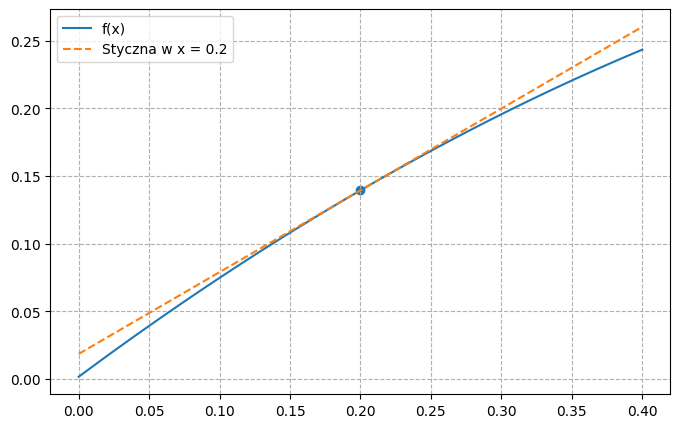

In [25]:
x_values = np.linspace(0, 0.4, 100)
y_values = [zad7(x) for x in x_values]

point = 0.2
f_prime = Dc4(zad7, point, 0.001)
styczna_y = zad7(point) + f_prime * (x_values - point)

plt.figure(figsize=(8, 5))
plt.plot(x_values, y_values, label="f(x)")
plt.plot(x_values, styczna_y, label="Styczna w x = 0.2", linestyle="--")
plt.scatter(point, zad7(point))
plt.legend()
plt.grid(linestyle="--")
plt.show()

### Zadanie 8
Korzystając z interpolacji wielomianowej, oblicz $f'(0)$ i $f''(0)$, jeśli dane są następujące:

| $x$      | $-2.2$  | $-0.3$  | $0.8$   | $1.9$   |
|----------|---------|---------|---------|---------|
| $f(x)$   | $15.180$| $10.962$| $1.920$ | $-2.040$|

In [14]:
def lagrange_derivative(x, xs, ys):
    '''
    Function:
        Funkcja obliczająca pochodną metodą Lagrangea
    Input:
        x (float) - punkt obliczania pochodnej
        xs (list) - argumenty funkcji
        ys (list) - wartości funkcji
    Output:
        result (float) - rozwiązanie
    ''' 
    result = 0
    n = len(xs)
    for i in range(n):
        sum = 0
        for j in range(n):
            if j != i:
                product = 1
                for k in range(n):
                    if k != i and k != j:
                        product *= (x - xs[k]) / (xs[i] - xs[k])
                sum += product / (xs[i] - xs[j])
        result += ys[i] * sum
    return result

def lagrange_second_derivative(x, xs, ys):
    '''
    Function:
        Funkcja obliczająca drugą pochodną metodą Lagrangea
    Input:
        x (float) - punkt obliczania pochodnej
        xs (list) - argumenty funkcji
        ys (list) - wartości funkcji
    Output:
        result (float) - rozwiązanie
    ''' 
    result = 0
    n = len(xs)
    for i in range(n):
        sum = 0
        for j in range(n):
            if j != i:
                product = 1
                for k in range(n):
                    if k != i and k != j:
                        product *= (x - xs[k]) / (xs[i] - xs[k])
                sum += product / ((xs[i] - xs[j])**2)
        result += ys[i] * sum
    return result

In [15]:
xs = np.array([-2.2, -0.3, 0.8, 1.9])
ys = np.array([15.180, 10.962, 1.920, -2.040])

print("f'(0) = ", lagrange_derivative(0, xs, ys))
print("f''(0) = ", lagrange_second_derivative(0, xs, ys))

f'(0) =  -8.56
f''(0) =  15.71316031412152


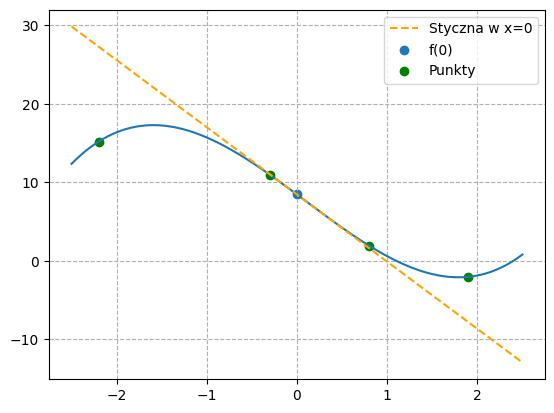

In [27]:
def lagrange_interpolation(x, xs, ys):
    return sum(ys[i] * np.prod([(x - xs[k]) / (xs[i] - xs[k]) for k in range(len(xs)) if k != i]) for i in range(len(xs)))

f_0 = lagrange_interpolation(0, xs, ys)

x_values = np.linspace(-2.5, 2.5, 500)
interp_values = [lagrange_interpolation(x, xs, ys) for x in x_values]
styczna = [lagrange_derivative(0, xs, ys) * x + f_0 for x in x_values]

plt.plot(x_values, interp_values)
plt.plot(x_values, styczna, label="Styczna w x=0", color="orange", linestyle="--")
plt.scatter(0, f_0, label="f(0)")
plt.scatter(xs, ys, color="green", label="Punkty")
plt.legend()
plt.grid(linestyle="--")
plt.show()